In [ ]:
from time import time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

np.random.seed(int(time()))

series = (5 + 100 * np.random.rand(1000)).astype(int)
series = pd.Series(series)

Метод rand(N) формирует выборку объема N из равномерного распредления на полуинтервале [0, 1). Собственно, поэтому наше распредление будет иметь вид равномерного. Того же результата мы могли добиться методом uniform. Чтобы изменить вид распредления достаточно воспользоваться другими методами из np.random (например, exponential, binomial, normal). 

Text(0, 0.5, 'Частота')

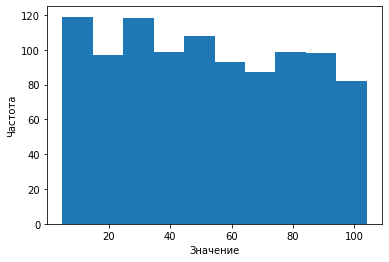

In [ ]:
plt.hist(series)
plt.xlabel("Значение")
plt.ylabel("Частота")

Далее определяются функции для вычисления основных статистик от выборки.

In [ ]:
# Выборочное среднее:
def sample_mean(sample):
  return sum(series) / len(series)

# Среднеквадратичное отклонение (смещенное и несмещенное):
def biased_standard_deviation(sample):
  return np.sqrt(sum([(i - sample_mean(sample)) ** 2 for i in sample]) / len(sample))

def unbiased_standard_deviation(sample):
  return np.sqrt(sum([(i - sample_mean(sample)) ** 2 for i in sample]) / (len(sample) - 1))

# Частота встречаемости. Возвращает словарь, где ключём будет служить число [5, 105), а значением - кол-во раз, которое оно встретилось в выборке:
def frequency(sample):
  d = defaultdict(int)
  for i in sample:
    d[i] += 1 / len(sample)
  for i in d.keys():
    d[i] = round(d[i], 3)
  return d


Вычисление статистик с помощью "своих" функций:

In [ ]:
print("Выборочное среднее:", sample_mean(series))
print("Стандартное отклонение на основе смещенной оценки дисперсии:", biased_standard_deviation(series))
print("Стандартное отклонение на основе несмещенной оценки дисперсии:", unbiased_standard_deviation(series))
print("Частота встречаемости:", frequency(series))

Выборочное среднее: 52.124
Стандартное отклонение на основе смещенной оценки дисперсии: 28.884678014476822
Стандартное отклонение на основе несмещенной оценки дисперсии: 28.89913119427268
Частота встречаемости: defaultdict(<class 'int'>, {79: 0.011, 60: 0.012, 17: 0.006, 13: 0.005, 89: 0.015, 87: 0.006, 59: 0.003, 100: 0.007, 90: 0.009, 80: 0.009, 21: 0.01, 56: 0.015, 104: 0.009, 82: 0.016, 38: 0.013, 12: 0.012, 32: 0.015, 34: 0.013, 41: 0.014, 83: 0.007, 24: 0.01, 58: 0.006, 67: 0.006, 103: 0.007, 36: 0.01, 96: 0.006, 84: 0.011, 23: 0.01, 10: 0.012, 20: 0.015, 29: 0.008, 102: 0.009, 47: 0.014, 48: 0.011, 5: 0.013, 73: 0.006, 70: 0.007, 42: 0.009, 97: 0.007, 49: 0.01, 63: 0.015, 30: 0.012, 46: 0.013, 62: 0.005, 93: 0.006, 91: 0.01, 85: 0.008, 40: 0.01, 94: 0.013, 45: 0.013, 33: 0.01, 57: 0.012, 92: 0.011, 74: 0.012, 37: 0.008, 6: 0.013, 64: 0.006, 76: 0.007, 95: 0.009, 65: 0.009, 68: 0.006, 28: 0.007, 99: 0.01, 66: 0.016, 31: 0.011, 43: 0.008, 54: 0.007, 50: 0.014, 81: 0.014, 88: 0.01,

Вычисление статистик с помощью pandas методов:

In [ ]:
print("Выборочное среднее:", series.values.mean())
print("Стандартное отклонение на основе смещенной оценки дисперсии:", series.std(ddof=0))
print("Стандартное отклонение на основе несмещенной оценки дисперсии:", series.std())
print("Частота встречаемости:")
print(series.value_counts(normalize=True))

Выборочное среднее: 52.124
Стандартное отклонение на основе смещенной оценки дисперсии: 28.884678014476822
Стандартное отклонение на основе несмещенной оценки дисперсии: 28.89913119427268
Частота встречаемости:
11    0.019
27    0.017
82    0.016
66    0.016
20    0.015
      ...  
52    0.005
72    0.004
55    0.004
44    0.003
59    0.003
Length: 100, dtype: float64
